## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [38]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

#### Import the CSV Data as Pandas DataFrame

In [39]:
df = pd.read_csv('data/raw.csv')

#### Show Top 5 Records

In [40]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_prep_course,math_score,reading_score,writing_score
0,female,group A,some college,standard,complete,45,86,91
1,female,group B,high school,standard,none,59,100,100
2,female,group A,associate's degree,standard,complete,43,64,35
3,male,group E,high school,free/reduced,complete,96,67,70
4,female,group D,bachelor's degree,standard,none,48,52,61


#### Preparing X and Y variables

In [41]:
X = df.drop(columns=['math_score'],axis=1)

In [42]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_prep_course,reading_score,writing_score
0,female,group A,some college,standard,complete,86,91
1,female,group B,high school,standard,none,100,100
2,female,group A,associate's degree,standard,complete,64,35
3,male,group E,high school,free/reduced,complete,67,70
4,female,group D,bachelor's degree,standard,none,52,61


In [43]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_prep_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group A' 'group B' 'group E' 'group D' 'group C']
Categories in'parental level of education' variable: ['some college' 'high school' "associate's degree" "bachelor's degree"
 'some high school' "master's degree"]
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['complete' 'none']


In [44]:
y = df['math_score']

In [45]:
y

0       45
1       59
2       43
3       96
4       48
        ..
1495    47
1496    42
1497    89
1498    70
1499    96
Name: math_score, Length: 1500, dtype: int64

In [46]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [47]:
X = preprocessor.fit_transform(X)

In [48]:
X

array([[ 1.        ,  0.        ,  1.        , ...,  0.        ,
         1.02795211,  1.26519973],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.69979533,  1.70817386],
       [ 1.        ,  0.        ,  1.        , ...,  0.        ,
        -0.02780151, -1.49108373],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.55582893,  0.9206643 ],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
        -1.46746555,  1.70817386],
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
         0.6440417 , -0.60513547]])

In [49]:
X.shape

(1500, 19)

In [50]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((1200, 19), (300, 19))

#### Create an Evaluate Function to give all metrics after model Training

In [51]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [52]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 20.3373
- Mean Absolute Error: 17.5276
- R2 Score: 0.0092
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 19.7264
- Mean Absolute Error: 16.9387
- R2 Score: -0.0152


Lasso
Model performance for Training set
- Root Mean Squared Error: 20.4310
- Mean Absolute Error: 17.6453
- R2 Score: 0.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 19.6549
- Mean Absolute Error: 16.8412
- R2 Score: -0.0078


Ridge
Model performance for Training set
- Root Mean Squared Error: 20.3373
- Mean Absolute Error: 17.5277
- R2 Score: 0.0092
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 19.7255
- Mean Absolute Error: 16.9376
- R2 Score: -0.0151


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 18.4865
- Mean Absolute Error: 15.4765
- R2 Score: 0.1813
------

### Results

In [53]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
1,Lasso,-0.007815
8,AdaBoost Regressor,-0.009528
2,Ridge,-0.015065
0,Linear Regression,-0.015165
5,Random Forest Regressor,-0.208468
3,K-Neighbors Regressor,-0.304264
7,CatBoosting Regressor,-0.312038
6,XGBRegressor,-0.538128
4,Decision Tree,-1.340955


## Linear Regression

In [54]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is -1.52


## Plot y_pred and y_test

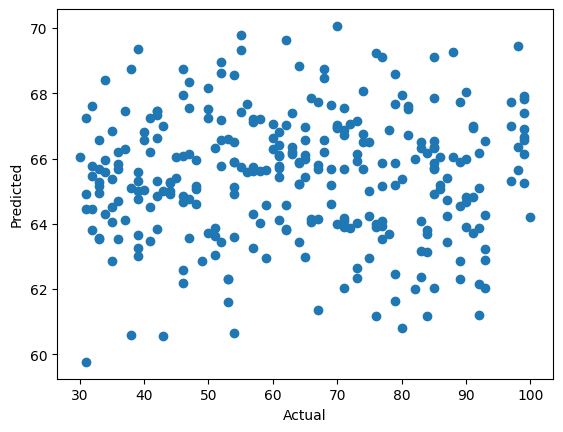

In [55]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

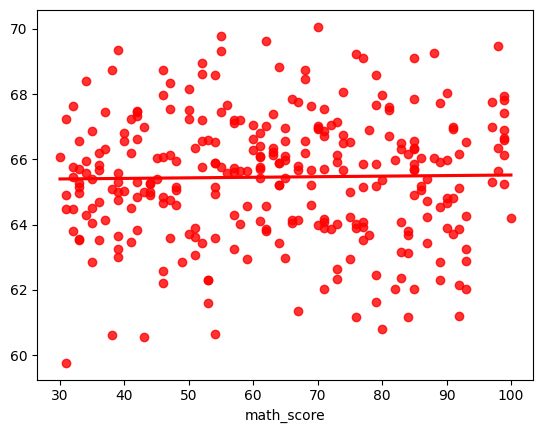

In [56]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [57]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
1116,77,65.158099,11.841901
1368,79,67.669924,11.330076
422,85,65.689042,19.310958
413,91,63.717863,27.282137
451,85,64.906481,20.093519
...,...,...,...
983,82,62.014358,19.985642
799,91,66.924351,24.075649
1265,50,67.528993,-17.528993
1150,68,68.463838,-0.463838
